In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_pairs
from sklearn.metrics import classification_report
from deepface import DeepFace
from time import time

In [3]:
lfw_faces = fetch_lfw_pairs(subset='test',resize=1,color=True,data_home="./Faces")

In [38]:
samples = np.random.choice(lfw_faces["pairs"].shape[0],size=100,replace=False)
pairs = lfw_faces["pairs"][samples]
target = lfw_faces["target"][samples]

In [39]:
pairs.shape

(100, 2, 125, 94, 3)

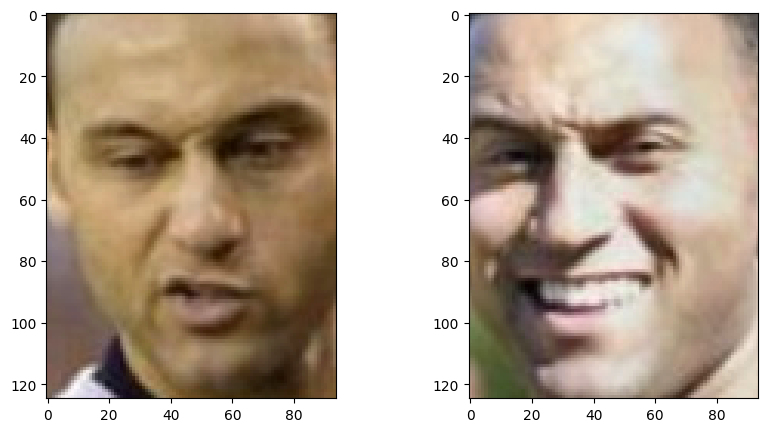

1


In [40]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(pairs[0][0]/255)
axes[1].imshow(pairs[0][1]/255)
plt.show()
print(target[0])

In [41]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]


predicted = []
for model in models:
    print(f"Current Model: {model}")
    predicted.append([])
    for img1, img2 in pairs:

        predicted[-1].append(
            DeepFace.verify(img1_path=img1,img2_path=img2,model_name=model,enforce_detection=False)["verified"]+0)
        
    print(f"{model} ended")

Current Model: VGG-Face
1/1 [==============================] - 0s 212ms/step
VGG-Face ended
Current Model: Facenet
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step
Facenet ended
Current Model: Facenet512
1/1 [==============================] - 0s 28ms/step
Facenet512 ended
Current Model: OpenFace
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
OpenFace ended
Current Model: DeepFace
1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 35ms/step
DeepFace ended
Current Model: DeepID
1/1 [==============================] - 0s 11ms/step
DeepID ended
Current Model: ArcFace
1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 53ms/step
ArcFace ended
Current Model: Dlib
Dlib ended
Current Model: SFace
SFace ended


In [4]:
class RecognitionModelsTesting:
    
    def __init__(self,images_pair,target,models,distance="cosine"):
        self.images_pair = images_pair
        self.target = target
        self.models = models
        self.distance = distance
        
    def start_prediction(self):
        self.predicted = {}
        self.avg_time = {}
        
        avg_time = self.avg_time
        predicted = self.predicted
        
        models = self.models
        images_pair = self.images_pair
        distance = self.distance
       
        for model in models:
            total_time = 0
            predicted[model] = []
            print(f"Current Model: {model}")
            for img1,img2 in images_pair:
                start_time = time()
                
                predicted[model].append(
                    DeepFace.verify(
                        img1_path=img1,
                        img2_path=img2,
                        model_name=model,
                        enforce_detection=False,
                        distance_metric=distance
                    )["verified"]+0
                )
                
                total_time += time()-start_time
                
            print(f"End of Model: {model}\nTotal Time Spent: {total_time}\n")
            avg_time[model] = total_time/len(images_pair)
            
        
    def prediction_result(self):
        models = self.models
        target = self.target
        predicted = self.predicted
        avg_time = self.avg_time 
        
        for model in models:
            
            print(f"Model: {model}")
            print(f"Average time spent: {avg_time[model]}")
            print(f"Classification report:\n{classification_report(predicted[model],target)}")


In [43]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

rt = RecognitionModelsTesting(pairs,target,models)
rt.start_prediction()
rt.prediction_result()

Current Model: VGG-Face
1/1 [==============================] - 0s 222ms/step
End of Model: VGG-Face
Total Time Spent: 47.5968337059021

Current Model: Facenet
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step
End of Model: Facenet
Total Time Spent: 9.690431356430054

Current Model: Facenet512
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step
End of Model: Facenet512
Total Time Spent: 9.7087984085083

Current Model: OpenFace
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 17ms/step
End of Model: OpenFace
Total Time Spent: 8.53028678894043

Current Model: DeepFace
1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 38ms/step
End of Model: DeepFace
Total Time Spent: 10.72985053062439

Current Model: DeepID
1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step
End of Model: DeepID
Total Time Spent: 5.425457715988159

Current Model: ArcFace
1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 52ms/step
End of Model: ArcFace
Total Time Spent: 14.002581119537354

Current Model: Dlib
End of Model: Dlib
Total Time Spent: 1.6960477828979492

Current Model: SFace
End of Model: SFace
Total Time Spent: 1.1847987174987793

Model: VGG-Face
Average time spent: 0.475968337059021
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        41
           1       0.98      0.85      0.91        59

    accuracy                           0.90       100
   macro avg       0.90      0.91      0.90       100
weighted avg       0.91      0.90      0.90       100

Model: Facenet
Average time spent: 0.09690431356430054
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        62
           1       0.75      1.00      0.85        38

    accuracy                           0.87       100
   macro avg       0.87      0.9

# Testing potential Models with whole test set
### Models: Facenet, Facenet 512 and ARCFace
#### Using cosine_distance

In [44]:
models = [
    "Facenet",
    "Facenet512",
    "ArcFace"
]

rt = RecognitionModelsTesting(lfw_faces["pairs"],lfw_faces["target"],models)
rt.start_prediction()

Current Model: Facenet
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step
End of Model: Facenet
Total Time Spent: 99.83195877075195

Current Model: Facenet512
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step
End of Model: Facenet512
Total Time Spent: 98.56647109985352

Current Model: ArcFace
1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 51ms/step
End of Model: ArcFace
Total Time Spent: 142.50573706626892



In [45]:
rt.prediction_result()

Model: Facenet
Average time spent: 0.09983195877075195
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       597
           1       0.81      1.00      0.89       403

    accuracy                           0.90      1000
   macro avg       0.90      0.92      0.90      1000
weighted avg       0.92      0.90      0.90      1000

Model: Facenet512
Average time spent: 0.09856647109985352
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       667
           1       0.67      1.00      0.80       333

    accuracy                           0.83      1000
   macro avg       0.83      0.87      0.83      1000
weighted avg       0.89      0.83      0.84      1000

Model: ArcFace
Average time spent: 0.14250573706626893
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       538


### Testing same models using Eucledian distance L2 norm.

In [46]:
models = [
    "Facenet",
    "Facenet512",
    "ArcFace"
]

rt = RecognitionModelsTesting(lfw_faces["pairs"],lfw_faces["target"],models,distance="euclidean_l2")
rt.start_prediction()

Current Model: Facenet
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step
End of Model: Facenet
Total Time Spent: 103.25890707969666

Current Model: Facenet512
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step
End of Model: Facenet512
Total Time Spent: 104.10179662704468

Current Model: ArcFace
1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 57ms/step
End of Model: ArcFace
Total Time Spent: 147.24554109573364



In [47]:
rt.prediction_result()

Model: Facenet
Average time spent: 0.10325890707969665
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85       672
           1       0.66      1.00      0.79       328

    accuracy                           0.83      1000
   macro avg       0.83      0.87      0.82      1000
weighted avg       0.89      0.83      0.83      1000

Model: Facenet512
Average time spent: 0.10410179662704468
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       511
           1       0.97      0.99      0.98       489

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Model: ArcFace
Average time spent: 0.14724554109573365
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.94       556


### Testing Dlib for whole dataset
##### 1st using cosine method then L2 norm

In [5]:
models = ["Dlib"]

rt = RecognitionModelsTesting(lfw_faces["pairs"],lfw_faces["target"],models,distance="cosine")
rt.start_prediction()

Current Model: Dlib
End of Model: Dlib
Total Time Spent: 16.571261167526245



In [6]:
rt.prediction_result()

Model: Dlib
Average time spent: 0.016571261167526247
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.87       655
           1       0.69      1.00      0.82       345

    accuracy                           0.84      1000
   macro avg       0.84      0.88      0.84      1000
weighted avg       0.89      0.84      0.85      1000



In [8]:
rt = RecognitionModelsTesting(lfw_faces["pairs"],lfw_faces["target"],models,distance="euclidean_l2")
rt.start_prediction()

Current Model: Dlib
End of Model: Dlib
Total Time Spent: 16.448375940322876



In [9]:
rt.prediction_result()

Model: Dlib
Average time spent: 0.016448375940322876
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       582
           1       0.83      0.99      0.90       418

    accuracy                           0.91      1000
   macro avg       0.91      0.92      0.91      1000
weighted avg       0.92      0.91      0.91      1000

